In [1]:
from dreye.stimuli.temporal.step import StepStimulus, RandomSwitchStimulus
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

In [2]:
step = StepStimulus(
    values={
        'a': [1,2,34], 
        'b': [-2, 3]
    }, 
    separate_channels=True, 
    repetitions=2, 
    iterations=2, 
    rate=60., 
    durations=[2,3], 
    pause_durations=[3,4,5], 
    randomize=True, 
    start_delay=5, 
    end_dur=5
)

In [3]:
step.events

,a,b,dur,pause,repeat,iter,delay,name
0,34.0,0.0,3.0,3.0,2,0,5.0,StepStimulus
1,1.0,0.0,2.0,4.0,0,0,11.0,StepStimulus
2,0.0,-2.0,2.0,4.0,3,0,17.0,StepStimulus
3,34.0,0.0,2.0,4.0,2,0,23.0,StepStimulus
4,2.0,0.0,3.0,4.0,1,0,30.0,StepStimulus
...,...,...,...,...,...,...,...,...
115,0.0,3.0,2.0,3.0,4,1,756.0,StepStimulus
116,1.0,0.0,2.0,3.0,0,1,761.0,StepStimulus
117,2.0,0.0,2.0,4.0,1,1,767.0,StepStimulus
118,0.0,-2.0,2.0,3.0,3,1,772.0,StepStimulus


In [4]:
step.events.dtypes

a         float64
b         float64
dur       float64
pause     float64
repeat      int64
iter        int64
delay     float64
name       object
dtype: object

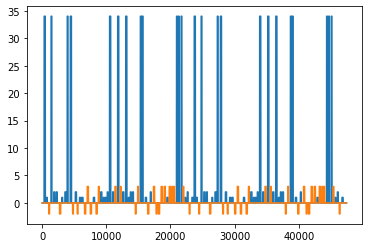

In [5]:
plt.plot(step.signal)

In [6]:
ran = RandomSwitchStimulus(
    values={
        'a': [3,1,0,-1], 
        'b': [-3, 3], 
        'c': [0, 1]
    },
    values_probs={
        'a': [1,2,3,4]
    }, 
    total_dur=30, 
    clip_dur=10, 
    rate=60, 
    iterations=2, 
    start_delay=10, 
    end_dur=10,
    seed=12, 
    baseline_values=[0, 1, 2], 
    **{'loc':2, 'scale':0.1}
)

In [7]:
ran.events

,channel,delay,dur,value,iter,name
0,c,11.883333,1.940857,1.0,0,RandomSwitchStimulus
1,b,11.966667,1.957288,3.0,0,RandomSwitchStimulus
2,a,11.900000,2.064350,1.0,0,RandomSwitchStimulus
3,c,13.833333,1.998179,1.0,0,RandomSwitchStimulus
4,b,13.916667,2.031754,3.0,0,RandomSwitchStimulus
...,...,...,...,...,...,...
83,b,89.250000,1.978881,-3.0,1,RandomSwitchStimulus
84,a,89.300000,2.090086,1.0,1,RandomSwitchStimulus
85,c,90.100000,1.945087,1.0,1,RandomSwitchStimulus
86,b,91.233333,2.018250,3.0,1,RandomSwitchStimulus


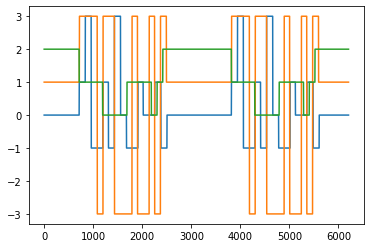

In [8]:
plt.plot(ran.signal)

In [9]:
ran.events.dtypes

channel     object
delay      float64
dur        float64
value      float64
iter         int64
name        object
dtype: object

In [10]:
from dreye.stimuli.temporal.noise import WhiteNoiseStimulus, BrownNoiseStimulus

In [11]:
wn = WhiteNoiseStimulus(
    rate=60, 
    n_channels=4, 
    mean=np.array([-1, 1, -1, 1]), 
    var=np.array([1,2,3,4]), 
    minimum=np.array([-10, -5, -1, -100]), 
    maximum=100, 
    iterations=2, 
    start_delay=1, 
    end_dur=1, 
    pause_dur=1, 
    seed=10, 
    filter_style='window', 
    filter_function='exponential', 
    filter_along_axis=0, 
    filter_kwargs={'M':5, 'tau':2.5}
)

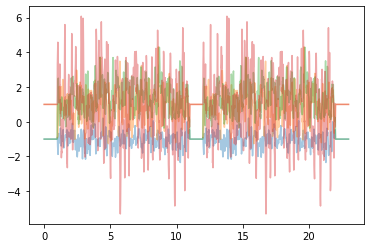

In [12]:
plt.plot(wn.timestamps, wn.signal, alpha=0.4)

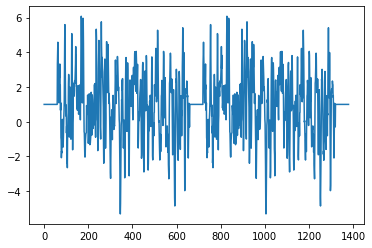

In [13]:
plt.plot(wn.signal[:, -1])

In [14]:
wn = WhiteNoiseStimulus(
    rate=60, 
    n_channels=4, 
    mean=np.array([-1, 1, -1, 1]), 
    var=np.array([1,2,3,4]), 
    minimum=np.array([-10, -5, -1, -100]), 
    maximum=100, 
    iterations=2, 
    start_delay=1, 
    end_dur=1, 
    pause_dur=1, 
    seed=12, 
    filter_style='filtfilt', 
    filter_function='butter', 
    filter_along_axis=0, 
    filter_kwargs=dict(
        N=5, Wn=1/30, btype='low', 
        analog=False,
    )
)

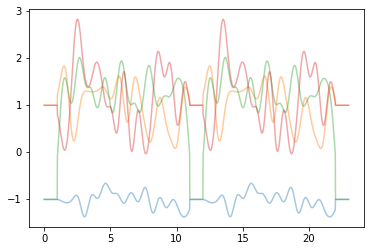

In [15]:
plt.plot(wn.timestamps, wn.signal, alpha=0.4)

In [16]:
wn = BrownNoiseStimulus(
    rate=60, 
    n_channels=4, 
    mean=np.array([1, 2, 3, 4]), 
    var=np.array([0.1, 0.2, 0.3, 0.4]), 
    minimum=np.array([-10, -5, -10, -100]), 
    maximum=100, 
    iterations=2, 
    start_delay=1, 
    end_dur=1, 
    pause_dur=1, 
    seed=12, 
    filter_style='filtfilt', 
    filter_function='butter', 
    filter_along_axis=0, 
    filter_kwargs=dict(
        N=5, Wn=1/30, btype='low', 
        analog=False,
    )
)

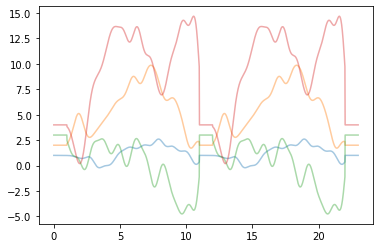

In [17]:
plt.plot(wn.timestamps, wn.signal, alpha=0.4)

In [18]:
wn.events

,delay,dur,iter,name,0,1,2,3
0,1.0,10.0,0,BrownNoiseStimulus,"[0.9892449904315378, 0.9889168374571484, 0.988...","[2.1617122027435207, 2.185604725824796, 2.2116...","[2.4510919580507102, 2.38828533293152, 2.32395...","[3.8215758000767144, 3.799408475239172, 3.7751..."
1,12.0,10.0,1,BrownNoiseStimulus,"[0.9892449904315378, 0.9889168374571484, 0.988...","[2.1617122027435207, 2.185604725824796, 2.2116...","[2.4510919580507102, 2.38828533293152, 2.32395...","[3.8215758000767144, 3.799408475239172, 3.7751..."


In [19]:
step.save('test_step_stim.json')

In [20]:
step2 = StepStimulus.load('test_step_stim.json')

In [21]:
step2.metadata

{}

In [22]:
wn.events.columns

Index(['delay', 'dur', 'iter', 'name', '0', '1', '2', '3'], dtype='object')

In [32]:
wn.save('test_wn_stim.json')

In [33]:
wn2 = WhiteNoiseStimulus.load('test_wn_stim.json')

In [34]:
wn2.settings

{'rate': 60,
 'seed': 12,
 'filter_style': 'filtfilt',
 'filter_function': 'butter',
 'filter_kwargs': {'N': 5,
  'Wn': 0.03333333333333333,
  'btype': 'low',
  'analog': False},
 'filter_along_axis': 0,
 'extra_kwargs': None,
 'stim_dur': 10,
 'mean': array([1, 2, 3, 4]),
 'var': array([0.1, 0.2, 0.3, 0.4]),
 'minimum': array([ -10,   -5,  -10, -100]),
 'maximum': 100,
 'iterations': 2,
 'start_delay': 1,
 'end_dur': 1,
 'pause_dur': 1,
 'n_channels': 4,
 'channel_names': None}

In [26]:
wn2.events

,delay,dur,iter,name,0,1,2,3
0,1.0,10.0,0,BrownNoiseStimulus,"[0.9892449904315378, 0.9889168374571484, 0.988...","[2.1617122027435207, 2.185604725824796, 2.2116...","[2.4510919580507102, 2.38828533293152, 2.32395...","[3.8215758000767144, 3.799408475239172, 3.7751..."
1,12.0,10.0,1,BrownNoiseStimulus,"[0.9892449904315378, 0.9889168374571484, 0.988...","[2.1617122027435207, 2.185604725824796, 2.2116...","[2.4510919580507102, 2.38828533293152, 2.32395...","[3.8215758000767144, 3.799408475239172, 3.7751..."


In [27]:
wn.events

,delay,dur,iter,name,0,1,2,3
0,1.0,10.0,0,BrownNoiseStimulus,"[0.9892449904315378, 0.9889168374571484, 0.988...","[2.1617122027435207, 2.185604725824796, 2.2116...","[2.4510919580507102, 2.38828533293152, 2.32395...","[3.8215758000767144, 3.799408475239172, 3.7751..."
1,12.0,10.0,1,BrownNoiseStimulus,"[0.9892449904315378, 0.9889168374571484, 0.988...","[2.1617122027435207, 2.185604725824796, 2.2116...","[2.4510919580507102, 2.38828533293152, 2.32395...","[3.8215758000767144, 3.799408475239172, 3.7751..."


In [28]:
from dreye.io.json import load_json, dump_json

In [29]:
wn.metadata['random_signal'].dtype

dtype('float64')

In [30]:
wn.to_dict().keys()

dict_keys(['stimulus', 'signal', 'metadata', 'events', 'settings', 'name', 'module'])